In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('us-accident-analysis')
jovian.set_colab_id('1WvgippfHPypcyKXkoH6y5K1YnnZCHtft')

     |████████████████████████████████| 68 kB 2.8 MB/s 


#us accident exploratory

# us-accident-analysis
### Todo - Talk about EDA
### Todo - talk about the dataset(source,what it contains,how it will be useful)
 -kaggle
 -information about accidents
 -Useful in preventing the accident

In [ ]:
!pip install jovian --upgrade --quiet

In [ ]:
pip install opendatasets --upgrade --quiet

###Downloading the dataset

In [ ]:
import opendatasets as od
download_url = 'https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents'
od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: shilpeesharma
Your Kaggle Key: ··········


100%|██████████| 269M/269M [00:01<00:00, 209MB/s]


In [ ]:
data_filename = './us-accidents/US_Accidents_Dec21_updated.csv'


In [ ]:
import jovian

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="us-accident-analysis")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/aasaliya-shilpee/us-accident-analysis


'https://jovian.ai/aasaliya-shilpee/us-accident-analysis'

##Data preparation and cleaning

1.   load the file using Pandas
2.   look at some information about the data.
3.   Fix any missing or incorrect values.










In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(data_filename)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Severity               int64         
 2   Start_Time             datetime64[ns]
 3   End_Time               object        
 4   Start_Lat              float64       
 5   Start_Lng              float64       
 6   End_Lat                float64       
 7   End_Lng                float64       
 8   Distance(mi)           float64       
 9   Description            object        
 10  Number                 float64       
 11  Street                 object        
 12  Side                   object        
 13  City                   object        
 14  County                 object        
 15  State                  object        
 16  Zipcode                object        
 17  Country                object        
 18  Timezone              

In [ ]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
len(df.columns)

47

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)
len(newdf.columns)

14

In [ ]:
missing_percentage=df.isna().sum().sort_values(ascending=False) /len(df)
missing_percentage

Number                   6.129003e-01
Precipitation(in)        1.931079e-01
Wind_Chill(F)            1.650568e-01
Wind_Speed(mph)          5.550967e-02
Wind_Direction           2.592834e-02
Humidity(%)              2.568830e-02
Weather_Condition        2.482514e-02
Visibility(mi)           2.479350e-02
Temperature(F)           2.434646e-02
Pressure(in)             2.080593e-02
Weather_Timestamp        1.783125e-02
Airport_Code             3.356011e-03
Timezone                 1.285961e-03
Nautical_Twilight        1.007612e-03
Civil_Twilight           1.007612e-03
Sunrise_Sunset           1.007612e-03
Astronomical_Twilight    1.007612e-03
Zipcode                  4.635647e-04
City                     4.814887e-05
Street                   7.029032e-07
Country                  0.000000e+00
Junction                 0.000000e+00
Start_Time               0.000000e+00
End_Time                 0.000000e+00
Start_Lat                0.000000e+00
Turning_Loop             0.000000e+00
Traffic_Sign

percentage of missing values per colunm

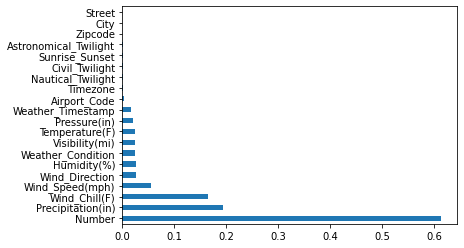

In [ ]:
missing_percentage[missing_percentage!=0].plot(kind='barh')

removing the columns which we won't use in analysis

##Analysis and visualization

###columns we'll analyze:
1. city
2. start time
3. weather condition
4. temperature
5. start lat, start lng

In [ ]:
df.City

0               Dublin
1               Dayton
2           Cincinnati
3                Akron
4           Cincinnati
              ...     
2845337      Riverside
2845338      San Diego
2845339         Orange
2845340    Culver City
2845341       Highland
Name: City, Length: 2845342, dtype: object

In [ ]:
len(df.City.unique())

11682

In [ ]:
cities_by_accident = df.City.value_counts()
cities_by_accident

Miami                           106966
Los Angeles                      68956
Orlando                          54691
Dallas                           41979
Houston                          39448
                                 ...  
Ridgedale                            1
Sekiu                                1
Wooldridge                           1
Bullock                              1
American Fork-Pleasant Grove         1
Name: City, Length: 11681, dtype: int64

In [ ]:
cities_by_accident[:20]

Miami           106966
Los Angeles      68956
Orlando          54691
Dallas           41979
Houston          39448
Charlotte        33152
Sacramento       32559
San Diego        26627
Raleigh          22840
Minneapolis      22768
Portland         20944
Nashville        20267
Austin           18301
Baton Rouge      18182
Phoenix          17143
Saint Paul       16869
New Orleans      16251
Atlanta          15622
Jacksonville     14967
Richmond         14349
Name: City, dtype: int64

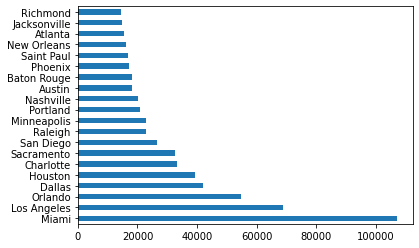

In [ ]:
cities_by_accident[:20].plot(kind='barh')

In [ ]:
import seaborn as sns
sns.set_style("darkgrid")

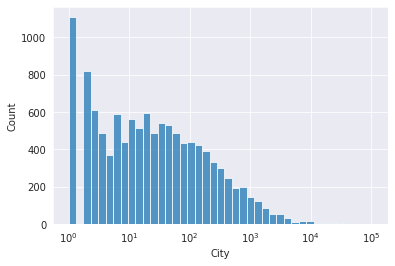

In [ ]:
sns.histplot(cities_by_accident,log_scale=True)

In [ ]:
df.Start_Time

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:51:45
4          2016-02-08 07:53:43
                  ...         
2845337    2019-08-23 18:03:25
2845338    2019-08-23 19:11:30
2845339    2019-08-23 19:00:21
2845340    2019-08-23 19:00:21
2845341    2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: object

In [ ]:
df.Start_Time = pd.to_datetime(df.Start_Time)

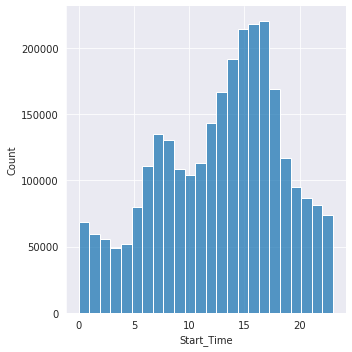

In [ ]:
sns.displot(df.Start_Time.dt.hour, bins=24, kde=False, )

1. A high percentage of accidents occurs between 11 am to 6 pm
2. The least percentage of accident occurs between 12 am to 5 am

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


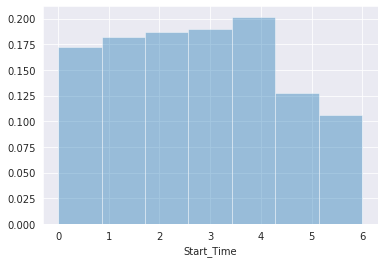

In [ ]:
sns.distplot(df.Start_Time.dt.dayofweek, bins=7, kde= False, norm_hist=True)

1.The percentage of accident occuring on weekends is lower as compared to weekdays.

To check if the distribution by hour of accidents is simillar for weekends as compared to weekdays

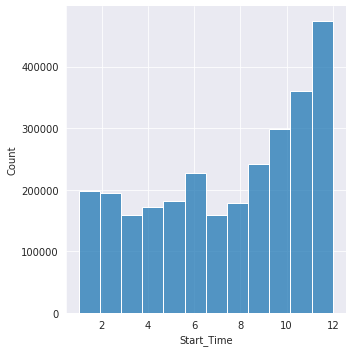

In [ ]:
sns.displot(df.Start_Time.dt.month, bins=12, kde=False, )

1. the number of accidents increases during the winter time.
2. Accidents are lower in march and july.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


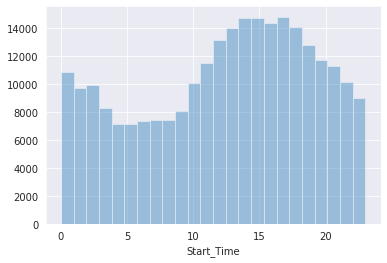

In [ ]:
Sunday_start_time=df.Start_Time[df.Start_Time.dt.dayofweek==6]
sns.distplot(Sunday_start_time.dt.hour, bins=24, kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


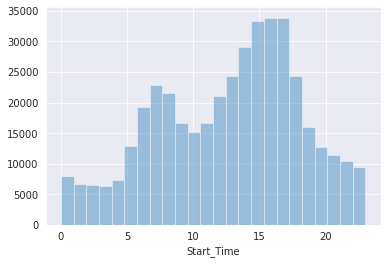

In [ ]:
monday_start_time=df.Start_Time[df.Start_Time.dt.dayofweek==0]
sns.distplot(monday_start_time.dt.hour, bins=24, kde=False)

1. On sunday we do see some difference in trend where number of accidents are more in early morning between 6 am to 9 am

In [ ]:
df.Start_Time.dt.year.unique()

array([2016, 2017, 2021, 2020, 2018, 2019])

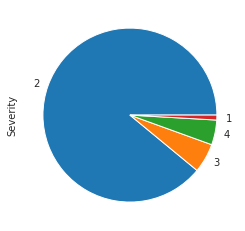

In [ ]:
df_2019=df[df.Start_Time.dt.year ==2019]
df.Severity.value_counts().plot(kind='pie')

1.The amount of accidents of severirity 2 is much higher than any other severity.
2. The minimum number of accident are of severity 1

In [ ]:
df_year=df.Start_Time[df.Start_Time.dt.year]
df_year.value_counts().unique()

array([1511745,  625864,  258615,  163918,  163176,  122024])

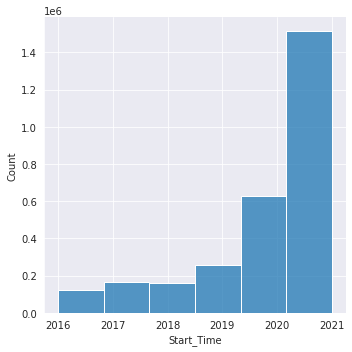

In [ ]:
sns.displot(df.Start_Time.dt.year, bins=6, kde=False, )

The number of accidents has shown an increasing trend over te years.

###Start Latitude and Longitude

In [ ]:
df.Start_Lat

0          40.108910
1          39.865420
2          39.102660
3          41.062130
4          39.172393
             ...    
2845337    34.002480
2845338    32.766960
2845339    33.775450
2845340    33.992460
2845341    34.133930
Name: Start_Lat, Length: 2845342, dtype: float64

In [ ]:
df.Start_Lng

0          -83.092860
1          -84.062800
2          -84.524680
3          -81.537840
4          -84.492792
              ...    
2845337   -117.379360
2845338   -117.148060
2845339   -117.847790
2845340   -118.403020
2845341   -117.230920
Name: Start_Lng, Length: 2845342, dtype: float64

In [ ]:
Sample_df = df.sample(int(0.1 * len(df)))

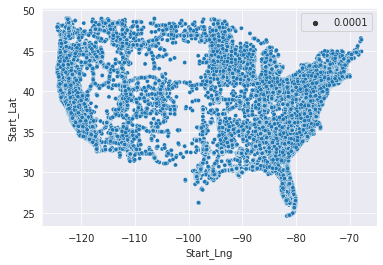

In [ ]:
sns.scatterplot(x=Sample_df.Start_Lng, y=Sample_df.Start_Lat, size= 0.0001)

In [ ]:
import folium

In [ ]:
lat, lon = df.Start_Lat[0], df.Start_Lng[0]
lat,lon

(40.10891, -83.09286)

In [ ]:
for x in df[['Start_Lat','Start_Lng']].sample(100).iteritems():
  print(x[1])

237685     40.452614
2813492    39.935150
1664608    29.651552
1208205    35.349186
1019956    38.944398
             ...    
197496     45.532069
1927179    44.566973
1663475    25.920088
1777553    40.734460
2012331    29.901129
Name: Start_Lat, Length: 100, dtype: float64
237685     -79.996071
2813492    -74.965560
1664608    -95.568727
1208205    -78.667656
1019956    -94.378194
              ...    
197496    -122.618303
1927179   -123.188935
1663475    -80.325095
1777553    -74.124235
2012331    -82.136571
Name: Start_Lng, Length: 100, dtype: float64


In [ ]:
zip(list(df.Start_Lat),list(df.Start_Lng))

In [ ]:
from folium import map

In [ ]:
from folium.plugins import HeatMap

In [ ]:
Sample_df=df.sample(int(0.001 * len(df)))
lat_lon_pairs = list(zip(list(df.Start_Lat),list(df.Start_Lng)))

In [ ]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
print(map)



In [ ]:
from pandas.core.algorithms import unique
State= df.State.unique()
len(State)

49

In [ ]:
states_by_accident = df.State.value_counts()
states_by_accident

CA    795868
FL    401388
TX    149037
OR    126341
VA    113535
NY    108049
PA     99975
MN     97185
NC     91362
SC     89216
MD     65085
AZ     56504
NJ     52902
TN     52613
UT     49193
LA     47232
IL     47105
MI     43843
GA     40086
WA     32554
CT     29762
MO     29633
CO     25340
OH     24409
IN     20850
AL     19322
MT     15964
AR     10935
IA      9607
DC      9133
KS      9033
OK      8806
ID      8544
WI      7896
WV      7632
KY      6638
MA      6392
NV      6197
MS      5320
DE      4842
RI      4451
NH      3866
NE      3320
NM      2370
ND      2258
ME      2193
WY       990
VT       365
SD       201
Name: State, dtype: int64

1. Califronia has the maximun number of accidents.
2. South decota has the least number of accidents.

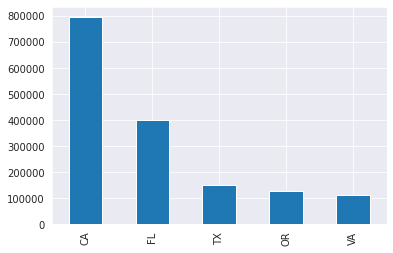

In [ ]:
states_by_accident[:5].plot(kind='bar')

top five states with highest number of accidents.

##summary and conclusion
Insights:


*   less than 5% of cities have more than 1000 yearly accidents
*   Number of accidents are higher in winters.


*   Accidents has increaded significantly in year 2021.
*   The majority of the accidents are of serverity 2.



